# Regressie - intro

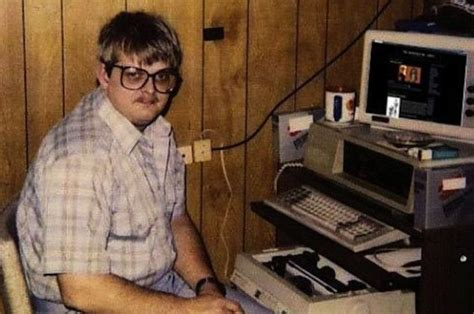

## Install

In [1]:
!pip3 install numpy
!pip3 install scipy

## Import

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as cp

## Predefine

In [3]:
def plot_init():
    
    fig, ax = plt.subplots()
    
    return ax


def plot_add(ax, x, y):
    
    ax.plot(x, y, linewidth=2.0)


def plot_show():
    
    plt.show()


def plot_graph(x, y):
    
    ax = plot_init()
    plot_add(ax, x, y)
    plot_show()

## Lineair verband
### Model
huizenprijs = vastgoed offset + prijs per oppervlak x oppervlak

p = 25.000 + 5.000 x oppervlak

### Stap 1: Maak huizenprijs model

1. gebruik numpy om datapunten (= x-waarden) te genereren in een bepaalde range
<br>
stap 2. bereken je Y-waarden
<br>
stap 3. genereer ' noise' met numpy (functie: ??? en 
<br>
stap 4: plot graph
<br>



In [4]:
# genereer datapunten
# numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)
opp = np.arange(50,200, 1) # opp = oppervlakte is array met aantal vierkante meters - mijn range is 50 - 200. Stapgrootte = 1
# Opm: een array is niet hetzelfde als een lijst
print(opp) 
print(f'Deze array bevat {len(opp)} datapunten.')

[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199]
Deze array bevat 150 datapunten.


In [5]:
#stap 2. bereken je Y-waarden
offset = 25000
priceOpp = 5000 * opp
priceHouse = priceOpp + offset # deze formule genereert je Y waarden

print(priceHouse)
print(f'Deze array bevat {len(priceHouse)} datapunten.')

[ 275000  280000  285000  290000  295000  300000  305000  310000  315000
  320000  325000  330000  335000  340000  345000  350000  355000  360000
  365000  370000  375000  380000  385000  390000  395000  400000  405000
  410000  415000  420000  425000  430000  435000  440000  445000  450000
  455000  460000  465000  470000  475000  480000  485000  490000  495000
  500000  505000  510000  515000  520000  525000  530000  535000  540000
  545000  550000  555000  560000  565000  570000  575000  580000  585000
  590000  595000  600000  605000  610000  615000  620000  625000  630000
  635000  640000  645000  650000  655000  660000  665000  670000  675000
  680000  685000  690000  695000  700000  705000  710000  715000  720000
  725000  730000  735000  740000  745000  750000  755000  760000  765000
  770000  775000  780000  785000  790000  795000  800000  805000  810000
  815000  820000  825000  830000  835000  840000  845000  850000  855000
  860000  865000  870000  875000  880000  885000  8

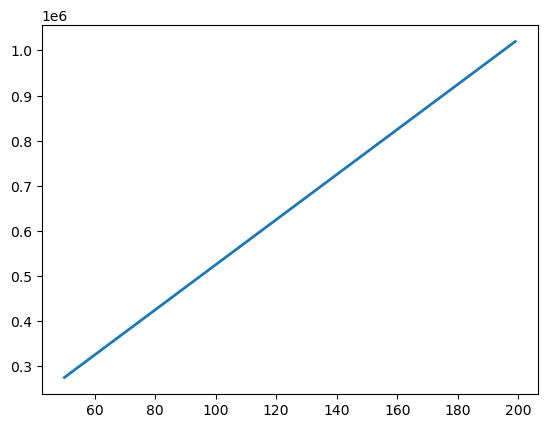

In [6]:
plot_graph(opp, priceHouse)

In [7]:
# noiseHousePr = np.random.normal(priceHouse,1,150) moet dan worden: 

noiseHousePr = np.random.normal(priceHouse,15000,150).astype(int) #45000 is de toegestane noise-afwijking, 60 is de lengte van de eerder geproduceerde lijst.
print(f'De lijst {noiseHousePr} bevat {len(noiseHousePr)} datapunten.')                            

De lijst [ 251897  294531  301286  291788  276194  295464  335588  294271  321257
  330435  319537  359302  332032  351777  352261  352142  340871  373465
  391701  391261  361426  388525  374453  371213  389353  420743  391734
  436505  439444  413734  444022  439421  452939  436737  469596  430308
  467588  450059  462714  465089  497567  506704  494590  469803  463679
  498332  521217  503853  527436  511661  514556  522948  524255  518524
  562381  551623  556722  562186  550217  568489  581942  555938  567181
  594840  608758  606311  605981  607656  608398  628335  612141  624716
  637785  642368  642407  658445  626539  668881  668799  677660  674983
  684780  692961  704670  668346  680821  717129  731585  725758  738589
  765322  734386  728477  732630  750466  743743  728460  759494  729449
  757816  790712  764839  769370  799700  788045  814513  831157  826961
  805288  842901  829222  827229  837224  840430  894251  837394  860780
  849887  861311  875692  891721  912344  

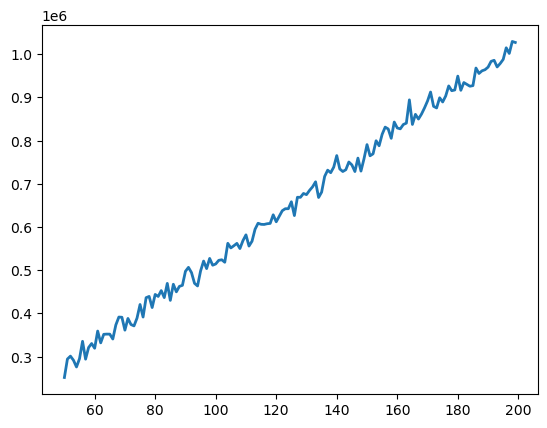

In [8]:
# plot alle huidige gegevens
plot_graph(opp,noiseHousePr)
plot_show()


### Stap 2: Bekijk interval [50, 75] m2

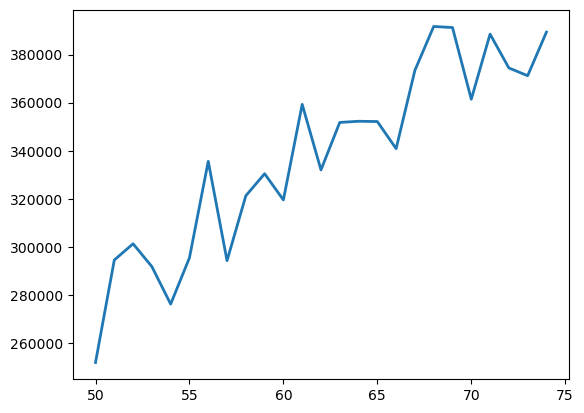

In [10]:

#bekijk de gegevens op het interval 50  -75  (75 doet zelf niet meer mee in het interval)
opp50_75 = opp[0:25]
noiseHousePr50_75 = noiseHousePr[0:25]
plot_graph(opp50_75,noiseHousePr50_75 )
plot_show()

### Stap 3: Fit data

#### Use the curve fitting

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Volgens bovenstaande link moet je de lijn gaan trekken met onderstaande functie:
scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)
In deze functie moet je nog verplicht 3 parameters invullen:
- f moet callable zijn - dat betekent dat het een functie moet zijn. Dit gaat in wezen om de berekening waarmee je de oorspronkelijke huizenprijs berekent. Die moet je ombouwen naar een def...
- de 2e parameter = lijst met oppervlaktes
- de 3e parameter  = lijst met noise-prijzen
    

[ 4909.123022   33315.57268683]


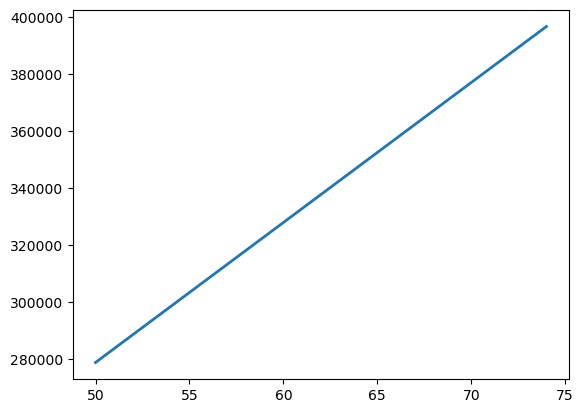

In [13]:
# Define our model
#Je moet hier een functie maken die de lineaire regressie gaat maken.

def fPriceHouse(x, a, b): 
    y = a*x + b
    return y



# Create fit

# Use scipy optimize package
# https://pythonguides.com/python-scipy-curve-fit/
# Gebruik hier alleen een deel van de data - de slice 50 - 75 mtrs
optimLine, var = cp.optimize.curve_fit(fPriceHouse, opp50_75, noiseHousePr50_75)#, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)
# ...
print(optimLine)
# Plot fit

plot_graph(opp50_75, optimLine[0] * opp50_75 + optimLine[1])
plot_show()


### Stap 4: Extrapoleer

[ 4970.2254782  29883.40132948]


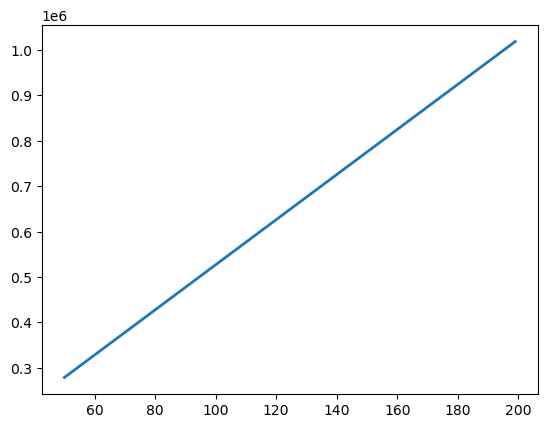

In [14]:
# Create fit

optimLine_all, var = cp.optimize.curve_fit(fPriceHouse, opp, noiseHousePr)
print(optimLine_all)
# Plot prediction for whole range

plot_graph(opp, optimLine_all[0] * opp + optimLine_all[1])
plot_show()


## Polynomiale verbanden

### Model

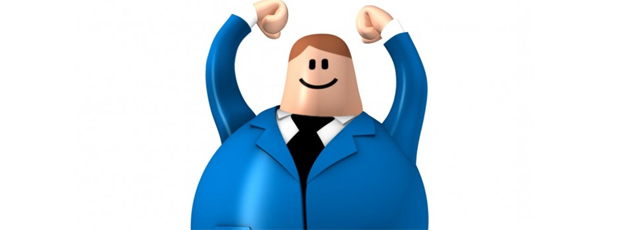

massa bolmannetje = dichtheid x bolvormigheid + benen + armen + hoofd

mass_bolman = 1.03 x radius^3 + 12.4 + 8.7 + 3.2

### Stap 1: Maak model bolmannetje

In [15]:
# ...
density = 1.03
radius = np.arange(30,150)        # de radius komt op de x-as
sphericity = radius**3 * density # '^' = tot de macht ...
legs = 12.4
arms = 8.7
head = 3.2

mass_bolman = sphericity + legs + arms + head # komt op de y-as

print(radius)
print(f'De array radius bevat {len(radius)} datapunten.')    
print(mass_bolman)
print(f'De array mass_bolman bevat {len(mass_bolman)} datapunten.')

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
De array radius bevat 120 datapunten.
[  27834.3    30709.03   33775.34   37039.41   40507.42   44185.55
   48079.98   52196.89   56542.46   61122.87   65944.3    71012.93
   76334.94   81916.51   87763.82   93883.05  100280.38  106961.99
  113934.06  121202.77  128774.3   136654.83  144850.54  153367.61
  162212.22  171390.55  180908.78  190773.09  200989.66  211564.67
  222504.3   233814.73  245502.14  257572.71  270032.62  282888.05
  296145.18  309810.19  323889.26  338388.57  353314.3   368672.63
  384

### Stap 2: Fit data

In [18]:
# Define our model

#Noise toevoegen aan mass_bolman
noiseMass_Bolman = np.random.normal(mass_bolman,7000,120).astype(int) #1000 is de toegestane noise-afwijking, 120 is de lengte van de eerder geproduceerde lijst.
print(noiseMass_Bolman)
print(f'De array noiseMass_Bolman bevat {len(noiseMass_Bolman)} datapunten.') 


[  27843   35533   28308   34868   43576   41965   50402   62403   51447
   65773   67634   64509   82701   87014   75537  103791  107055  114158
  116713  124464  127826  124786  151418  151577  171312  181832  184814
  181322  209972  203046  216187  228356  238544  261498  273906  282998
  306093  312704  327812  344790  364479  370871  398738  395433  412491
  428255  442801  465395  488798  518526  521442  555853  562971  593212
  610301  626890  662119  688524  688879  733502  749239  780048  795233
  832663  841348  889318  924530  945426  971517 1005746 1029059 1053496
 1098522 1126504 1156259 1180561 1227418 1263866 1295800 1332076 1375362
 1410935 1440455 1474354 1531388 1568967 1609742 1648014 1684048 1730571
 1777716 1835576 1873304 1916295 1964180 2014042 2055521 2107010 2165277
 2203420 2264343 2317043 2378297 2422693 2485804 2547943 2594464 2645553
 2710249 2771277 2824099 2887496 2935705 3008795 3085548 3131938 3215024
 3271679 3344094 3407167]
De array noiseMass_Bolman

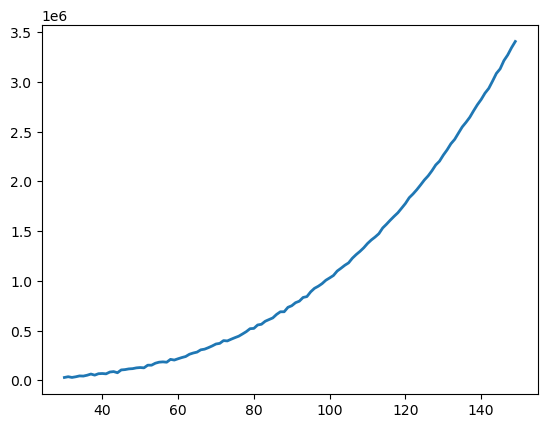

In [19]:
# plot alle huidige gegevens
plot_graph(radius, noiseMass_Bolman)
plot_show()

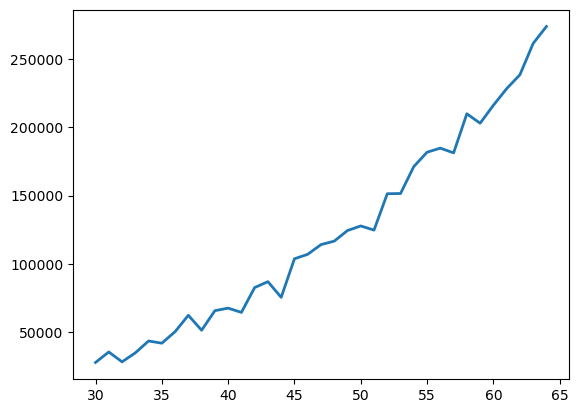

In [20]:
#bekijk de gegevens op het interval 30  - 65 (65 doet zelf niet meer mee in het interval)
radius30_65 = radius[0:35]
noiseMass_Bolman30_65 = noiseMass_Bolman[0:35]
plot_graph(radius30_65,noiseMass_Bolman30_65 )
plot_show()

(array([ 1.90965266e+01, -8.11049291e+04, -3.44596773e+04, -8.91155573e+04]), array([[ 6.29488660e-02,  9.73055728e+17,  1.89759571e+18,
        -2.87065143e+18],
       [ 9.73055728e+17,  5.39791100e+38,  3.33060364e+38,
        -8.72851462e+38],
       [ 1.89759571e+18,  3.33060364e+38,  3.57277994e+38,
        -6.90338356e+38],
       [-2.87065143e+18, -8.72851462e+38, -6.90338356e+38,
         1.56318982e+39]]))


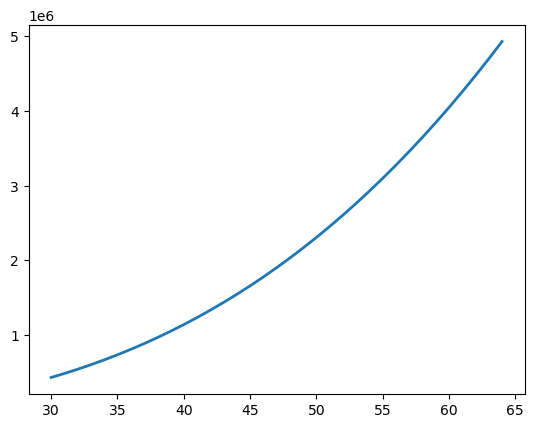

In [21]:

# Define our model
#Je moet hier een functie maken die de lineaire regressie gaat maken.


def massbolman(density,radius,legs, arms, head): 
    mass = density * radius**3 + legs + arms + head
    return mass

# Create fit

# Use scipy optimize package
# https://pythonguides.com/python-scipy-curve-fit/
# Gebruik hier alleen een deel van de data - de slice radius 30 - 65
optimLine_massB = cp.optimize.curve_fit(massbolman, radius30_65, noiseMass_Bolman30_65)#, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)
# ...
print(optimLine_massB)
# Plot fit
y = optimLine_massB[0][0] * radius30_65**3 + optimLine_massB[0][1]

#plot_graph(radius30_65, optimLine_massB[0][0] * radius30_65**3 + optimLine_massB[0][1]) # 
plot_graph(radius30_65, y) # 
plot_show()

(array([ 1.90965266e+01, -8.11049291e+04, -3.44596773e+04, -8.91155573e+04]), array([[ 6.29488660e-02,  9.73055728e+17,  1.89759571e+18,
        -2.87065143e+18],
       [ 9.73055728e+17,  5.39791100e+38,  3.33060364e+38,
        -8.72851462e+38],
       [ 1.89759571e+18,  3.33060364e+38,  3.57277994e+38,
        -6.90338356e+38],
       [-2.87065143e+18, -8.72851462e+38, -6.90338356e+38,
         1.56318982e+39]]))


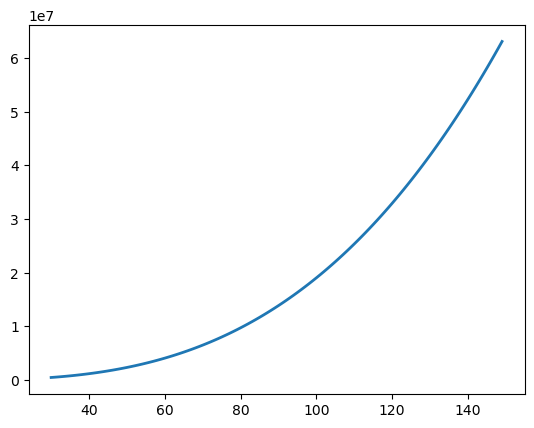

In [22]:
optimLine_massB = cp.optimize.curve_fit(massbolman, radius30_65, noiseMass_Bolman30_65)#, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, **kwargs)
# ...
print(optimLine_massB)
# Plot fit
y = optimLine_massB[0][0] * radius**3 + optimLine_massB[0][1]

#plot_graph(radius30_65, optimLine_massB[0][0] * radius30_65**3 + optimLine_massB[0][1]) # 
plot_graph(radius, y) # 
plot_show()

## Combinatie periodiek en exponentieel verband

### Model

Finding Seasonal Trends in Time-Series Data

https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861